# Prediciting Employee Productivity Using Tree Models

We will be using data from [UCI Machine Learning repository]("https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees").

Below is a description of the dataset given by the data producers:

"The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. 

Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. 

This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes."


Attribute information:

01	date			:	Date in MM-DD-YYYY

02	day			:	Day of the Week

03	quarter			:	A portion of the month. A month was divided into four quarters

04	department		:	Associated department with the instance

05	team_no			:	Associated team number with the instance

06	no_of_workers		:	Number of workers in each team

07	no_of_style_change	:	Number of changes in the style of a particular product

08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.

09	smv			:	Standard Minute Value, it is the allocated time for a task

10	wip			:	Work in progress. Includes the number of unfinished items for products

11	over_time		:	Represents the amount of overtime by each team in minutes

12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13	idle_time		:	The amount of time when the production was interrupted due to several reasons

14	idle_men		:	The number of workers who were idle due to production interruption

15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.



In [1]:
# Importing required libraries

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\jdgoe\Downloads\productivity+prediction+of+garment+employees\garments_worker_productivity.csv")

## Data Exploration

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

`wip` has a good amount of Null values, let's evaluate what we should do about it if anything.

In [5]:
df['wip'].value_counts().sort_values(ascending=False)

1039.0    5
1282.0    4
562.0     3
1413.0    3
1422.0    3
         ..
357.0     1
817.0     1
1576.0    1
1262.0    1
914.0     1
Name: wip, Length: 548, dtype: int64

In [6]:
df.shape

(1197, 15)

In [7]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


## Data Cleaning

It is hard to tell what to do with this column, the minimum and maximum are drastically different and the minimum is '7' so it is tempting to use '0' for the null values. However, the mean and median are both right around 1,000 so that tells us 0 is unlikely for the remaining rows and the average seems standard (also, the IQR is fairly low so it's safe to assume most land around the average), so we could just impute the average for all null values. I'm more inclined to drop the entire column, but I will use the average for now then consider attempting a model without the column altogether after. We will use the median instead of the mean because the mean is far closer to the upper quartile.

In [8]:
median_wip = df['wip'].median()
df['wip'].fillna(median_wip, inplace=True)

In [9]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### `department` column

In [10]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [11]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Here we see two different values with 'finishing', one has a space at the end of it; let's strip it so they are equivalent.

In [12]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

`date` column

In [13]:
df["date"].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [14]:
df["date"].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

We will drop the date column since it only contains 3 months and there isn't much we could infer from that

In [15]:
df.drop('date', axis=1)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


`quarter` column

In [16]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Since there are such little observations in quarter 5 we will drop those rows.

In [17]:
df = df[df['quarter'] != 'Quarter5']

Let's also remove 'quarter' from the value names because it is not necessary

In [18]:
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

1    360
2    335
4    248
3    210
Name: quarter, dtype: int64

In [19]:
df["quarter"] = df["quarter"].astype("int")
df[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1153 non-null   int32
dtypes: int32(1)
memory usage: 13.5 KB


`idle` columns

In [20]:
df['idle_men'].value_counts().sort_values

<bound method Series.sort_values of 0     1135
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64>

In [21]:
df['idle_time'].value_counts().sort_values()

90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
3.5         3
0.0      1135
Name: idle_time, dtype: int64

We will remove these columns because they are mostly filled with '0' as the value so they will not likely bring any use.

In [22]:
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0,8.0,0.886500


In fact, let's drop the `wip` column since there were so many missing values

In [23]:
df = df.drop("wip", axis = 1)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


Finally, we will remove the "no_of_style_change" column, due to only 147 observations where there are changes. Also, they were only one or two style changes.

In [24]:
df = df.drop("no_of_style_change", axis = 1)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


After finishing with all the column deletions, let's focus on the "no_of_workers" column, which features floats instead of integers. We should fix this because we can't have 1.25 workers; it's either 1 or 2.

In [25]:
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


Also, "actual_productivity" should feature two decimals, just like "targeted_productivity".

In [26]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


The following step is crucial: since we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.

To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [27]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10, random_state = 14)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
886,2/23/2015,4,finishing,Monday,12,0.80,5.13,1080,0,9,0.90,True
794,2/16/2015,3,sweing,Monday,4,0.75,30.10,7020,0,58,0.75,True
219,1/13/2015,2,finishing,Tuesday,3,0.80,4.15,1620,0,9,0.90,True
435,1/25/2015,4,sweing,Sunday,8,0.50,15.09,720,23,52,0.50,True
146,1/8/2015,2,sweing,Thursday,11,0.35,12.52,25920,38,54,0.35,True
889,2/23/2015,4,sweing,Monday,4,0.80,30.10,7140,38,59,0.80,True
428,1/25/2015,4,finishing,Sunday,7,0.65,3.94,2520,0,14,0.75,True
1094,3/7/2015,1,sweing,Saturday,11,0.80,11.41,3420,50,58,0.80,True
960,2/26/2015,4,finishing,Thursday,9,0.75,2.90,960,0,8,0.41,False
741,2/12/2015,2,finishing,Thursday,2,0.80,3.94,2160,0,18,0.60,False


We have removed a number of columns by this point. Let's see which ones still remain.

In [28]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

To finish with this part of the data cleaning process, we will reorder the columns to make the dataset easier to read.

In [29]:
df = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,True,1920,25.90,50


## Data Cleaning Part II

### Categorical encoding

We will now apply categorical encoding to the "department" column, which includes binary values. We'll transform them into booleans:

In [30]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True) # Also changing column's name here
df.head(10)

,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,1,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,0,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,1,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,1,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,1,6,56,0.80,0.80,True,1920,25.90,50
5,1,Thursday,1,7,56,0.80,0.80,True,6720,25.90,38
6,1,Thursday,0,2,8,0.75,0.76,True,960,3.94,0
7,1,Thursday,1,3,57,0.75,0.75,True,6900,28.08,45
8,1,Thursday,1,2,55,0.75,0.75,True,6000,19.87,34
9,1,Thursday,1,1,57,0.75,0.75,True,6900,28.08,45


The "department" column is now called "dept_sweing" and its values have to be interpreted in boolean terms: if it's 1 (or "True"), it means the observation belongs to the "sweing" department; if it's 0 ("False"), then it belongs to the "finishing" department.

For the "quarter" column, we will use "dummies", because if we leave the numbers as they currently are, the Decision Tree would believe that quarter 4 is greater than quarter 1, for example.

In other words, since they are categories instead of ordinal values, every category must have its own column, and the boolean process that we described for the previous column applies here. In case this isn't clear, we will be examining an example after performing the necessary data transformations.

The following code creates the dummies and also removes the original "quarter" column. The prefix parameter adds a "q_" prefix to all columns, so we can easily identify which ones are the dummies. Hence, the result will be to add four new columns to our dataset: "q_1", "q_2", "q_3" and "q_4".

In [31]:
df = pd.concat([df, pd.get_dummies(df["quarter"], prefix = "q")], axis = 1) \
       .drop(["quarter"], axis = 1)
df.sample(10, random_state = 14)

,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4
886,Monday,0,12,9,0.80,0.90,True,1080,5.13,0,0,0,0,1
794,Monday,1,4,58,0.75,0.75,True,7020,30.10,0,0,0,1,0
219,Tuesday,0,3,9,0.80,0.90,True,1620,4.15,0,0,1,0,0
435,Sunday,1,8,52,0.50,0.50,True,720,15.09,23,0,0,0,1
146,Thursday,1,11,54,0.35,0.35,True,25920,12.52,38,0,1,0,0
889,Monday,1,4,59,0.80,0.80,True,7140,30.10,38,0,0,0,1
428,Sunday,0,7,14,0.65,0.75,True,2520,3.94,0,0,0,0,1
1094,Saturday,1,11,58,0.80,0.80,True,3420,11.41,50,1,0,0,0
960,Thursday,0,9,8,0.75,0.41,False,960,2.90,0,0,0,0,1
741,Thursday,0,2,18,0.80,0.60,False,2160,3.94,0,0,1,0,0


Let's now repeat this process for the "day" column. Remember that for this one there are no "Friday" observations.

In [32]:
df = pd.concat([df, pd.get_dummies(df["day"], prefix= None)], axis=1) \
       .drop(["day"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
886,0,12,9,0.80,0.90,True,1080,5.13,0,0,0,0,1,1,0,0,0,0,0
794,1,4,58,0.75,0.75,True,7020,30.10,0,0,0,1,0,1,0,0,0,0,0
219,0,3,9,0.80,0.90,True,1620,4.15,0,0,1,0,0,0,0,0,0,1,0
435,1,8,52,0.50,0.50,True,720,15.09,23,0,0,0,1,0,0,1,0,0,0
146,1,11,54,0.35,0.35,True,25920,12.52,38,0,1,0,0,0,0,0,1,0,0
889,1,4,59,0.80,0.80,True,7140,30.10,38,0,0,0,1,1,0,0,0,0,0
428,0,7,14,0.65,0.75,True,2520,3.94,0,0,0,0,1,0,0,1,0,0,0
1094,1,11,58,0.80,0.80,True,3420,11.41,50,1,0,0,0,0,1,0,0,0,0
960,0,9,8,0.75,0.41,False,960,2.90,0,0,0,0,1,0,0,0,1,0,0
741,0,2,18,0.80,0.60,False,2160,3.94,0,0,1,0,0,0,0,0,1,0,0


The "team" column will also receive the same treatment. Given that there are 12 teams, these dummies will constitute the group with the highest number of added columns. In other words, we will be adding 12 columns to our dataset because of this transformation process in particular.

In [33]:
df = pd.concat([df, pd.get_dummies(df["team"], prefix= "team")], axis=1) \
       .drop(["team"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
886,0,9,0.80,0.90,True,1080,5.13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
794,1,58,0.75,0.75,True,7020,30.10,0,0,0,...,0,1,0,0,0,0,0,0,0,0
219,0,9,0.80,0.90,True,1620,4.15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
435,1,52,0.50,0.50,True,720,15.09,23,0,0,...,0,0,0,0,0,1,0,0,0,0
146,1,54,0.35,0.35,True,25920,12.52,38,0,1,...,0,0,0,0,0,0,0,0,1,0
889,1,59,0.80,0.80,True,7140,30.10,38,0,0,...,0,1,0,0,0,0,0,0,0,0
428,0,14,0.65,0.75,True,2520,3.94,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1094,1,58,0.80,0.80,True,3420,11.41,50,1,0,...,0,0,0,0,0,0,0,0,1,0
960,0,8,0.75,0.41,False,960,2.90,0,0,0,...,0,0,0,0,0,0,1,0,0,0
741,0,18,0.80,0.60,False,2160,3.94,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Building the Decision Tree

In [34]:
# Feature and target columns

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

For the X variable, we removed the column "actual_productivity", because it would've been the target column for a Regression Tree. As for "productive", it's the target column we will use here, so we took it out from "X" and it became "y".

In [35]:
# Dividing in training and test sets with train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

# Instantiating and fitting the Decision Tree Classifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred), 3))

Accuracy: 0.805


## Visualizing and Evaluating the Tree

In [36]:
tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

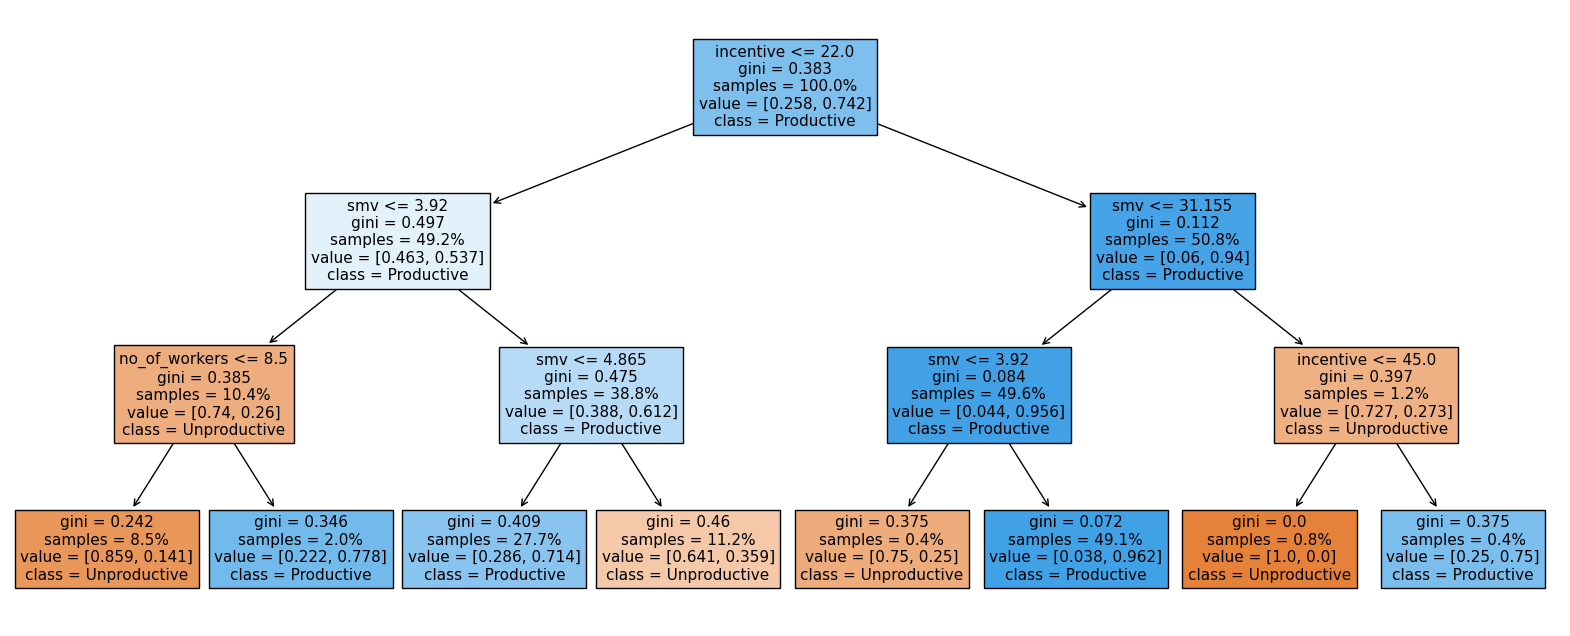

In [37]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = list(X.columns), 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

We can see here that the most significant columns turned out to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one ("no_of_workers"), used these columns to progressively divide the dataset into more homogeneous subsets.

### Metrics Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[ 32,  25],
       [ 20, 154]], dtype=int64)

**[[True Negatives, False Positives],**

**[False Negatives, True Positives]]**

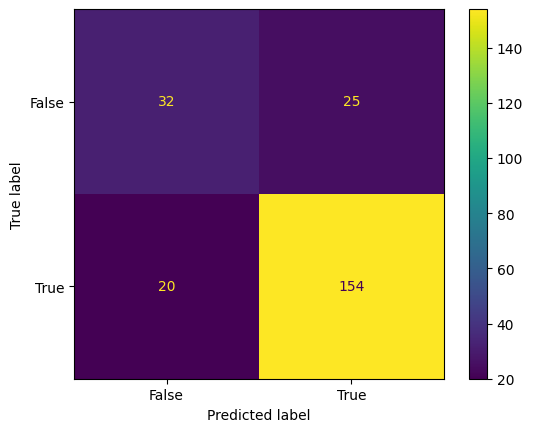

In [39]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)

disp.plot()
plt.show()

In [40]:
# Calculate precision, recall, f1

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", round(precision_score(y_test, y_pred), 2))

print("Recall:", round(recall_score(y_test, y_pred), 2))

print("F1 Score:", round(f1_score(y_test, y_pred), 2))

Precision: 0.86
Recall: 0.89
F1 Score: 0.87


We also have another option to evaluate our tree: Cross Validation. It divides the dataset into blocks/folds (the number of folds is determined by the "cv" parameter). Then it creates that many copies of the dataset where each copy will have a different segment of observations compared to the test set.

The algorithm will then iterate on each copy and will output a list of the accuracy scores for all iterations.

This is a practical way to ensure that we didn't get the original accuracy score by pure chance by comparing it with several other possible results.

To improve readability in the calculations below, we have rounded the values to two decimals.

In [41]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 


print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.84 0.88 0.81 0.88 0.86 0.82 0.74 0.77 0.83 0.77]
Mean Cross Validation Score: 0.82


In [42]:
# Cross validation values for other metrics

from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

multiple_cross_scores["test_precision"].round(2)

array([0.85, 0.9 , 0.82, 0.86, 0.85, 0.87, 0.79, 0.85, 0.85, 0.82])

In [43]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


In [44]:
multiple_cross_scores["test_recall"].round(2)

array([0.95, 0.94, 0.95, 1.  , 0.99, 0.88, 0.88, 0.85, 0.93, 0.88])

In [45]:
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated Recall: 0.93


In [46]:
multiple_cross_scores["test_f1"].round(2)

array([0.9 , 0.92, 0.88, 0.92, 0.91, 0.88, 0.84, 0.85, 0.89, 0.85])

In [47]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


We have pretty solid metrics all around!

### Grid Search CV

Let's use a grid search to see if other parameters will give us better results

In [48]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

# Perform a grid search over the hyperparameter grid using cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
                           param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


print(f'hyperparameters: {grid_search.best_params_}')
print(f'Best accuracy score: {round(grid_search.best_score_, 3)}')

hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score: 0.845


This best accuracy score is better than what we were working with, let's try now cross validating this

In [49]:
# Create model with best hyparameters
top_tree = DecisionTreeClassifier(**grid_search.best_params_, random_state=24)
top_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=24)

In [50]:
# Make predictions using 'top_tree'
y_pred = top_tree.predict(X_test)


# Evaluate model with different metrics
top_tree_acc = accuracy_score(y_test, y_pred)
top_tree_precision = precision_score(y_test, y_pred, pos_label=True) # explicitly specify positive label to avoid ValueError
top_tree_recall = recall_score(y_test, y_pred, pos_label=True)
top_tree_f1 = f1_score(y_test, y_pred, pos_label=True)


print(f'Accuracy: {top_tree_acc}')
print(f'Precision: {round(top_tree_precision, 3)}')
print(f'Recall: {round(top_tree_recall, 3)}')
print(f'F1 Score: {round(top_tree_f1, 3)}')

Accuracy: 0.8095238095238095
Precision: 0.861
Recall: 0.891
F1 Score: 0.876


These metrics look slightly worse than the original model

In [51]:
multiple_cross_scores = cross_validate(
                             top_tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

multiple_cross_scores["test_precision"].round(2)
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
multiple_cross_scores["test_recall"].round(2)
print("Mean Cross Validated Recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
multiple_cross_scores["test_f1"].round(2)
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.85
Mean Cross Validated Recall: 0.9
Mean Cross Validated F1: 0.87


This model is slightly worse, but it is good to see that our accuracy is relatively similar across different parameters and folds of data

## Explaining the Tree

Now that we have confirmed our most promising tree, we should explain the insights we can take from the model.

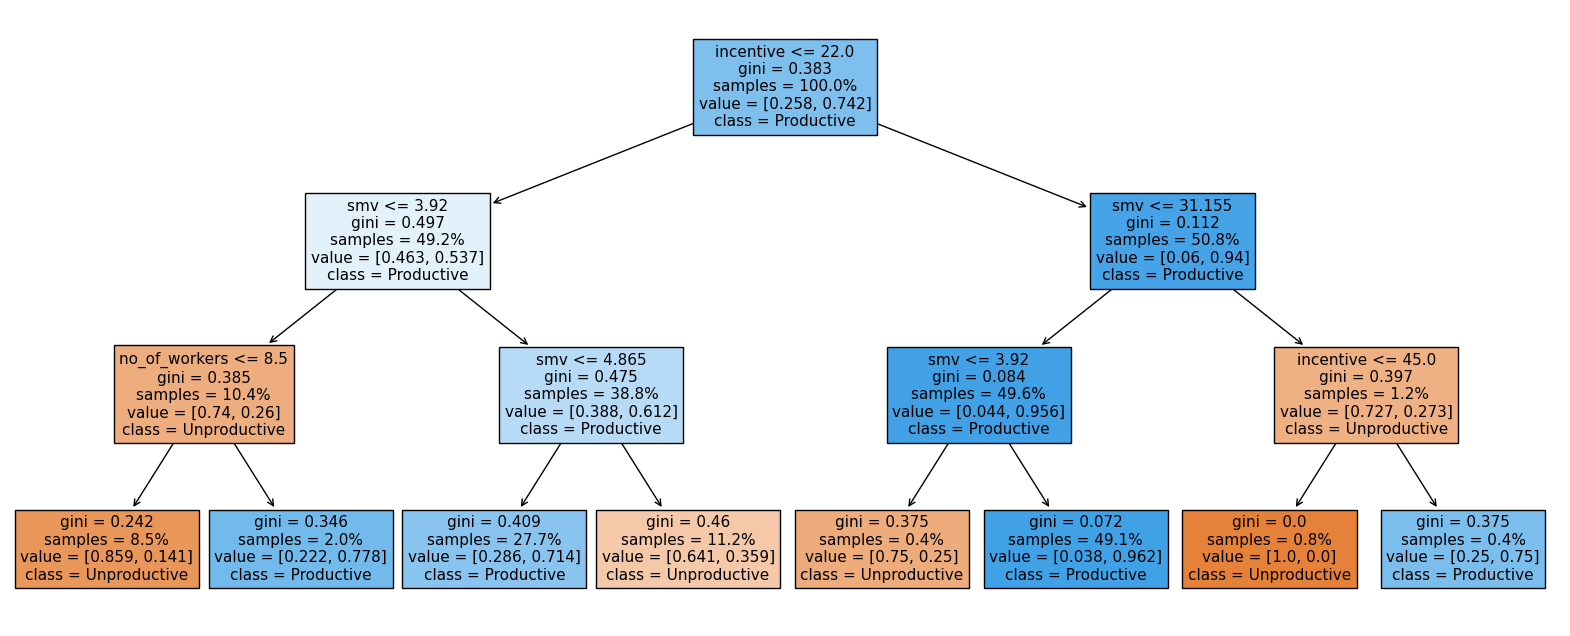

In [52]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = list(X.columns), 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. To provide context, the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.

The score at the top of each node is the threshold determining if we continue to the right or left.

If **True** = **Left**. **False** = **Right**

We can continue to pass characteristics of a group through each threshold until we conclude their final satus at the final node.

The best way to comprehend this would be to use an example:

    - Starting at the top, we go down to the left if the group has an incentive score less than or equal to 22, and to the right if not. 
    - Say it is less, we now would go down to the left if the smv is less than or equal to 3.92, and down to the right if not.
        - To the left(smv <= 3.92), the class is likely unproductive. However, if the no_of_workers is greater than 8.5, then they will be productive. We see this makes up 2% of the sample.
        - To the right(smv > 3.92), the class is likely productive, once the smv crosses a threshold of 4.87, they are considered unproductive(11% of sample)
    
    So, a group with an incentive less than or equal to 22, smv greater than 3.92 and less then 4.87 is productive. Then, a group with an incentive less than or equal to 22, but an smv greater than 4.87 is unproductive.

## Using Random Forest

To confirm and validate the results from our Decision Tree model, let's use a Random Forest to compare results.

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))


Accuracy: 0.81


Let's also check the Out of Bag Score. As a reminder, when Random Forest generates training subsets for every individual Tree, it leaves out some observations of the dataset, and if we activate the OOB Score then those observations will be used as test subsets.

In [54]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.85


Since the evaluation metrics of our Random Forest are similar to the scores of our Decision Tree, we can be confident about our results!

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.